In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt, SimpleExpSmoothing

In [87]:
# data  = pd.read_excel( "C:/Users/michelj8/Documents/GitHub/Dynamic-MESS/unemployment.xlsx")
data  = pd.read_excel( "C:/Users/michelj8/Documents/GitHub/Dynamic-MESS/bea_pce.xlsx")
region_names = ['New England', 'Mideast', 'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain', 'Far West']

In [92]:
region_data = data[data['GeoName'].isin(region_names)].copy()
# region_data = region_data[ region_data['Description'] == 'Total employment (number of jobs)']
region_data = region_data[ region_data['Description'] == 'Personal consumption expenditures']

region_data = region_data.set_index('GeoName')
year_list = range(1998,2019)

region_data = region_data[year_list]
region_data

1998       1999       2000       2001       2002  \
GeoName                                                                 
New England      352227.2   375440.4   403810.9   423621.4   439930.2   
Mideast         1070029.3  1137444.4  1221955.0  1281280.4  1333677.0   
Great Lakes      946320.2  1004153.2  1073254.3  1114348.1  1153233.2   
Plains           399299.2   427406.6   457567.3   476384.6   495285.9   
Southeast       1306974.9  1398105.4  1505215.0  1570896.9  1633755.6   
Southwest        597462.4   640177.2   692980.3   728204.1   754390.7   
Rocky Mountain   186027.2   201553.0   219454.6   230248.9   238902.2   
Far West        1015944.5  1091375.1  1184368.2  1236892.0  1289252.8   

                     2003       2004       2005       2006       2007  ...  \
GeoName                                                                ...   
New England      462852.1   491925.7   522267.6   549178.8   571337.1  ...   
Mideast         1408977.0  1492350.8  1582926.4  1667241.0  1740937.9  ...   
Great Lakes     1204027.2  1266678.3  1330825.0  1388059.2  1442438.6  ...   
Plains           518675.2   547279.8   573746.0   601708.3   629050.5  ...   
Southeast       1723384.8  1845351.3  1980875.3  2111557.2  2214277.1  ...   
Southwest        791487.6   842431.8   910140.0   974792.7  1029508.4  ...   
Rocky Mountain   250653.4   268010.1   287903.6   309147.3   328976.7  ...   
Far West        1357601.1  1452797.4  1552493.7  1652262.8  1742607.1  ...   

                     2009       2010       2011       2012       2013  \
GeoName                                                                 
New England      580193.8   595489.0   616079.4   632304.2   649595.1   
Mideast         1770156.1  1828914.3  1901821.4  1955380.6  2012235.0   
Great Lakes     1453901.9  1498666.3  1558390.3  1600250.2  1634821.0   
Plains           649014.2   670571.0   703198.8   728316.4   748491.7   
Southeast       2249357.3  2332441.6  2435214.0  2520363.2  2587568.2   
Southwest       1060417.8  1103841.6  1167566.4  1221580.7  1263787.3   
Rocky Mountain   334126.6   343990.7   359507.7   373729.5   387690.6   
Far West        1736044.3  1803549.9  1889733.2  1966002.3  2025118.5   

                     2014       2015       2016       2017       2018  
GeoName                                                                
New England      675701.0   698936.5   720065.6   748738.4   780025.8  
Mideast         2098140.9  2168716.9  2241141.1  2328038.5  2443375.0  
Great Lakes     1694766.2  1749174.6  1804437.4  1876027.3  1958408.8  
Plains           776267.3   801115.5   827365.7   863153.8   901081.8  
Southeast       2701997.1  2808811.8  2913197.6  3037883.5  3189759.8  
Southwest       1332550.7  1384484.0  1436047.7  1504392.8  1590184.1  
Rocky Mountain   408212.8   428612.2   450409.6   475684.0   505415.2  
Far West        2127162.5  2237546.8  2349218.1  2471641.0  2620511.4  

[8 rows x 21 columns]

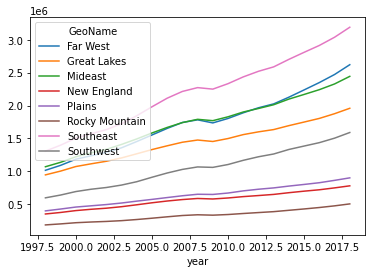

In [93]:
region_data_long = region_data.reset_index().melt( id_vars=['GeoName'], var_name='year', value_name = 'value')
region_data_long['value'] = region_data_long['value'].astype(float)
region_data = pd.pivot_table( region_data_long, index = 'year', columns = 'GeoName' , values = 'value')
region_data.plot()

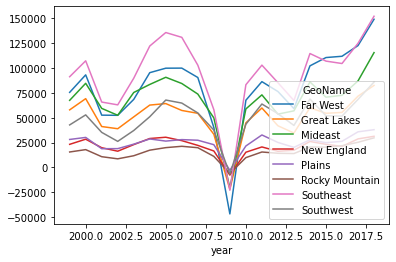

In [95]:
delta_region_data = region_data.diff(1).dropna()
dynamic_spatial_data =  pd.pivot_table(delta_region_data.reset_index(), columns = 'year').loc[region_names]

delta_region_data.plot()

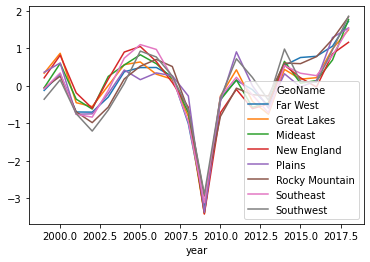

In [96]:
spatial_df = dynamic_spatial_data.copy()

series_means = spatial_df.mean(axis = 1)
normalized_spatial_df = spatial_df.copy()
normalized_spatial_df = normalized_spatial_df.sub(series_means, axis = 0)
series_sd = normalized_spatial_df.std(axis = 1)
normalized_spatial_df = normalized_spatial_df.div(series_sd, axis = 0)
year_list = normalized_spatial_df.columns

pd.pivot_table( normalized_spatial_df.reset_index(), columns = 'GeoName').plot()

In [97]:
# #Weight matrix based on adjacent neighbors
map_weight_matrix = np.zeros([8,8])

map_weight_matrix[0,1] = 1.0
map_weight_matrix[1,[0,2,4]] = 1.0/3.0
map_weight_matrix[2,[1,3,4]] = 1.0/3.0
map_weight_matrix[3,[2,4,5,6]] = 1.0/4.0
map_weight_matrix[4,[1,2,3,5]] = 1.0/4.0
map_weight_matrix[5,[3,4,6,7]] = 1.0/4.0
map_weight_matrix[6,[3,5,7]] = 1.0/3.0
map_weight_matrix[7,[5,6]] = 1.0/2.0

In [98]:
region_names

['New England',
 'Mideast',
 'Great Lakes',
 'Plains',
 'Southeast',
 'Southwest',
 'Rocky Mountain',
 'Far West']

In [99]:
pd.DataFrame(map_weight_matrix)

0         1         2         3         4         5     6         7
0  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.00  0.000000
1  0.333333  0.000000  0.333333  0.000000  0.333333  0.000000  0.00  0.000000
2  0.000000  0.333333  0.000000  0.333333  0.333333  0.000000  0.00  0.000000
3  0.000000  0.000000  0.250000  0.000000  0.250000  0.250000  0.25  0.000000
4  0.000000  0.250000  0.250000  0.250000  0.000000  0.250000  0.00  0.000000
5  0.000000  0.000000  0.000000  0.250000  0.250000  0.000000  0.25  0.250000
6  0.000000  0.000000  0.000000  0.333333  0.000000  0.333333  0.00  0.333333
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.500000  0.50  0.000000

In [100]:
for region in region_names:
    model = Holt(region_data.diff(1).dropna()[region].values).fit(optimized=True)
    print(region, model.params['smoothing_level'], model.params['smoothing_slope'])

New England 0.5410208595602591 0.0
Mideast 2.5559725781788868e-08 0.0
Great Lakes 2.2962970445332154e-09 1.045416644757427e-09
Plains 2.518536740365707e-09 0.0
Southeast 0.776386983798814 0.0
Southwest 2.822706401008959e-09 8.555560282059873e-11
Rocky Mountain 1.0 0.0
Far West 0.4974340225772752 0.0


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [116]:
for region in region_names:
    model = Holt(region_data.diff(1).dropna().loc[:2008][region].values).fit(optimized=True)
    print(region, model.params['smoothing_level'], model.params['smoothing_slope'])

New England 1.0 0.0
Mideast 1.0 0.0
Great Lakes 0.8816662032608138 0.0
Plains 4.7148021192910235e-08 0.0
Southeast 1.0 1.0
Southwest 1.0 1.0
Rocky Mountain 1.0 1.0
Far West 1.0 0.0


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [117]:
for region in region_names:
    model = Holt(region_data.diff(1).dropna().loc[2010:][region].values).fit(optimized=True)
    print(region, model.params['smoothing_level'], model.params['smoothing_slope'])

New England 0.0002899696609104021 0.000289964664014492
Mideast 6.907533400582882e-09 0.0
Great Lakes 9.636543811656067e-09 0.0
Plains 0.7368421052631038 0.7368421052631579
Southeast 2.716167070151022e-05 2.7160022482572476e-05
Southwest 2.5898663674387953e-08 0.0
Rocky Mountain 4.820850614067887e-09 0.0
Far West 1.4129373579225475e-08 2.8258747158450923e-09


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
